Set the Dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

file_name = 'Metro_Interstate_Traffic_Volume.csv'

try:
    df = pd.read_csv(file_name)
    print("Dataset chargé")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please make sure the CSV file is in the correct directory or provide the full path.")

Dataset chargé


Set style of plot

In [11]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Default figure size

Exploration

In [16]:
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


First 5 rows:
   traffic_volume holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0            5545     NaN  288.28      0.0      0.0          40       Clouds   
1            4516     NaN  289.36      0.0      0.0          75       Clouds   
2            4767     NaN  289.58      0.0      0.0          90       Clouds   
3            5026     NaN  290.13      0.0      0.0          90       Clouds   
4            4918     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description         date_time  
0    scattered clouds  02-10-2012 09:00  
1       broken clouds  02-10-2012 10:00  
2     overcast clouds  02-10-2012 11:00  
3     overcast clouds  02-10-2012 12:00  
4       broken clouds  02-10-2012 13:00  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       482

Data processing

In [42]:
#Convert 'date_time' to datetime objects

df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")# Extract time features
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek # Monday=0, Sunday=6
df['day_name'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
print("\nTime features extracted (showing first 5 rows with new columns):")

print(df[['date_time', 'hour', 'day_name', 'month', 'year']].head())

print(df.head())

# Convertir la colonne 'temp' (Kelvin) en Celsius
df['temp'] = df['temp'] - 273.15




Time features extracted (showing first 5 rows with new columns):
            date_time  hour day_name  month  year
0 2012-10-02 09:00:00     9  Tuesday     10  2012
1 2012-10-02 10:00:00    10  Tuesday     10  2012
2 2012-10-02 11:00:00    11  Tuesday     10  2012
3 2012-10-02 12:00:00    12  Tuesday     10  2012
4 2012-10-02 13:00:00    13  Tuesday     10  2012
   traffic_volume holiday   temp  rain_1h  snow_1h  clouds_all weather_main  \
0            5545     NaN  15.13      0.0      0.0          40       Clouds   
1            4516     NaN  16.21      0.0      0.0          75       Clouds   
2            4767     NaN  16.43      0.0      0.0          90       Clouds   
3            5026     NaN  16.98      0.0      0.0          90       Clouds   
4            4918     NaN  17.99      0.0      0.0          75       Clouds   

  weather_description           date_time  hour  day_of_week day_name  month  \
0    scattered clouds 2012-10-02 09:00:00     9            1  Tuesday     10   

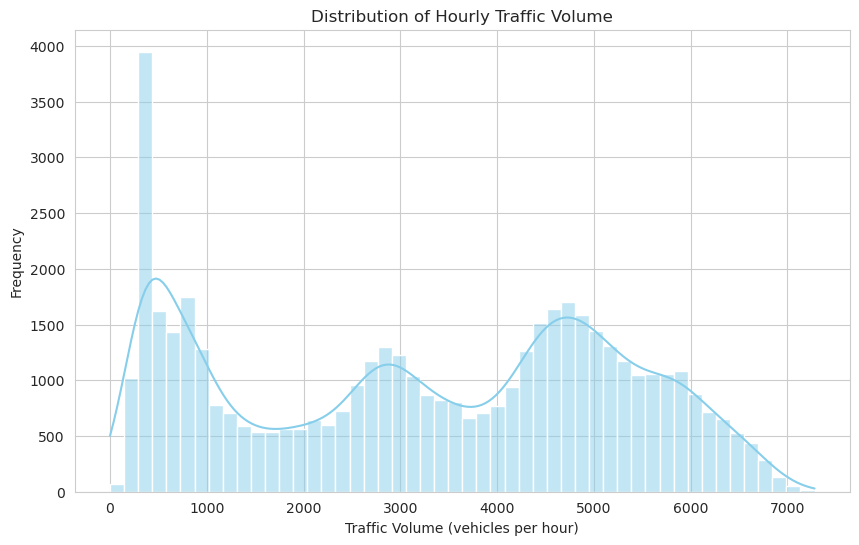

In [ ]:
#Traffic volume frenquency

plt.figure(figsize=(10, 6))
sns.histplot(df['traffic_volume'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Hourly Traffic Volume')
plt.xlabel('Traffic Volume (vehicles per hour)')
plt.ylabel('Frequency')
plt.show()

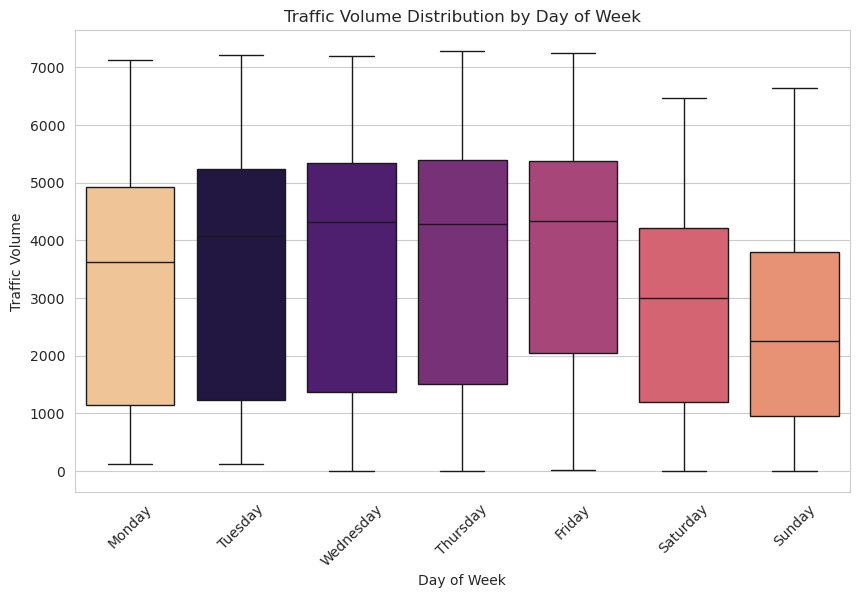

In [28]:
# Traffic Volume by Day of Week
plt.figure(figsize=(10, 6))
day_order = ["Monday", 
            "Tuesday",
            "Wednesday",
            "Thursday",
            "Friday",
            "Saturday",
            "Sunday"]
sns.boxplot(
            data=df, x='day_name', y='traffic_volume',
            order=day_order, palette='magma',hue='day_name', legend=False
            )
plt.title('Traffic Volume Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.show()

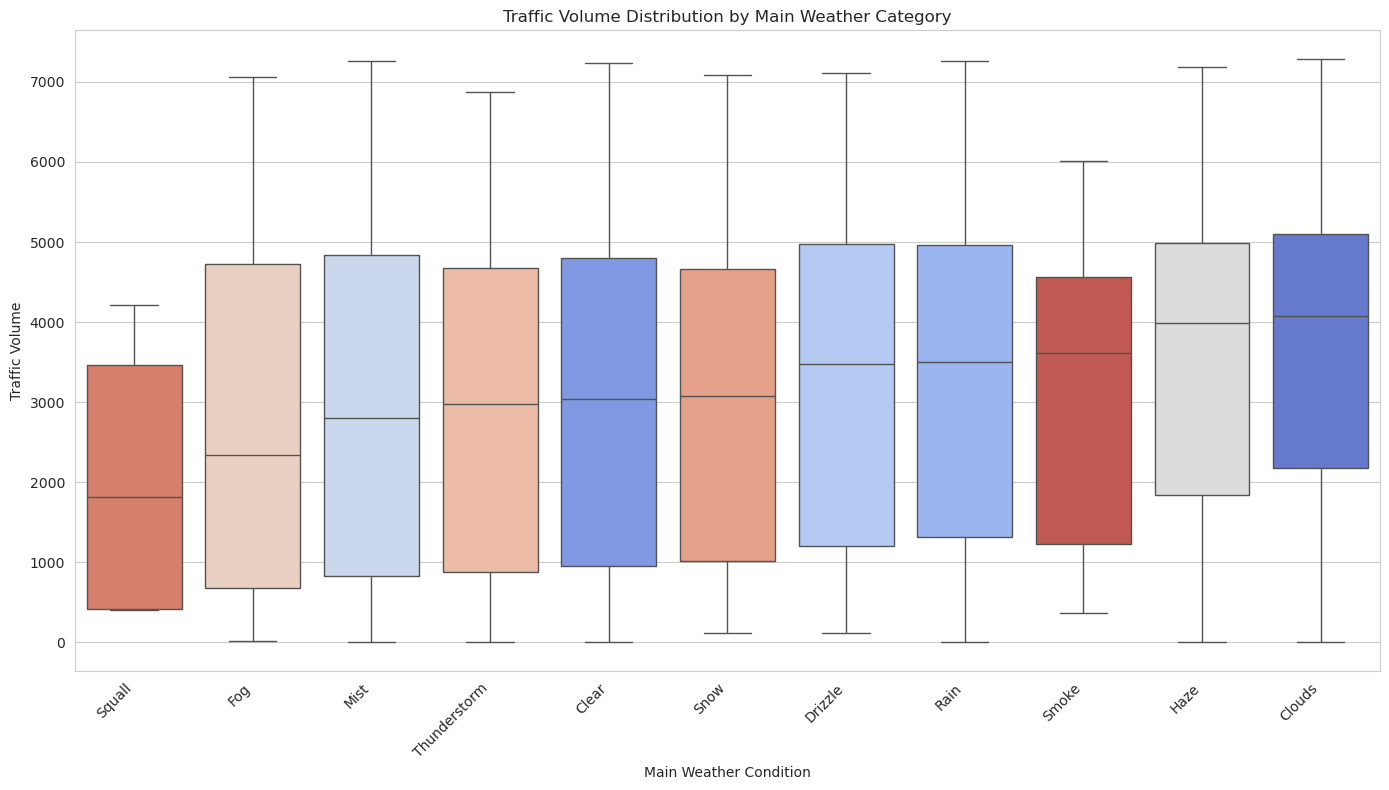

In [31]:
#Traffic vs Weather

plt.figure(figsize=(14, 8))
# Order categories by median traffic volume for better visualization
weather_order = (df.groupby('weather_main')['traffic_volume'].median()
                 .sort_values().index
)
sns.boxplot(
            data=df, x='weather_main', y='traffic_volume', order=weather_order,
            palette='coolwarm', hue='weather_main', legend=False
            )
plt.title('Traffic Volume Distribution by Main Weather Category')
plt.xlabel('Main Weather Condition')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

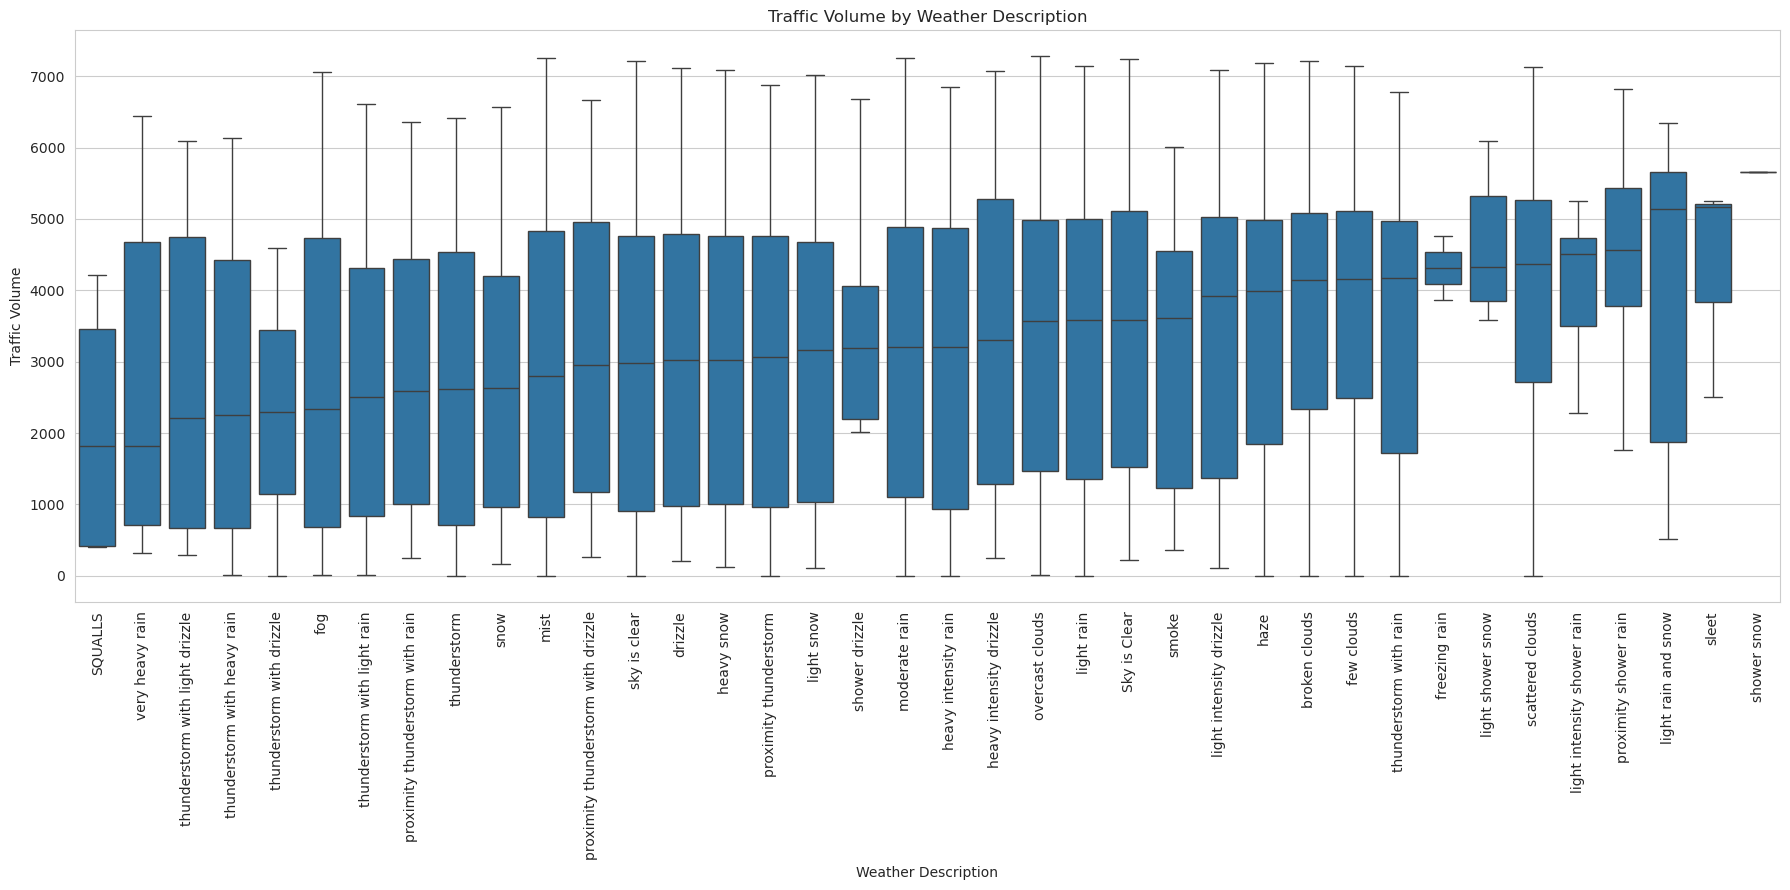

In [32]:
plt.figure(figsize=(18, 9))
desc_order = (
    df.groupby('weather_description')['traffic_volume']
    .median()
    .sort_values()
    .index
)
sns.boxplot(
    data=df,
    x='weather_description',
    y='traffic_volume',
    order=desc_order
)
plt.title('Traffic Volume by Weather Description')
plt.xlabel('Weather Description')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

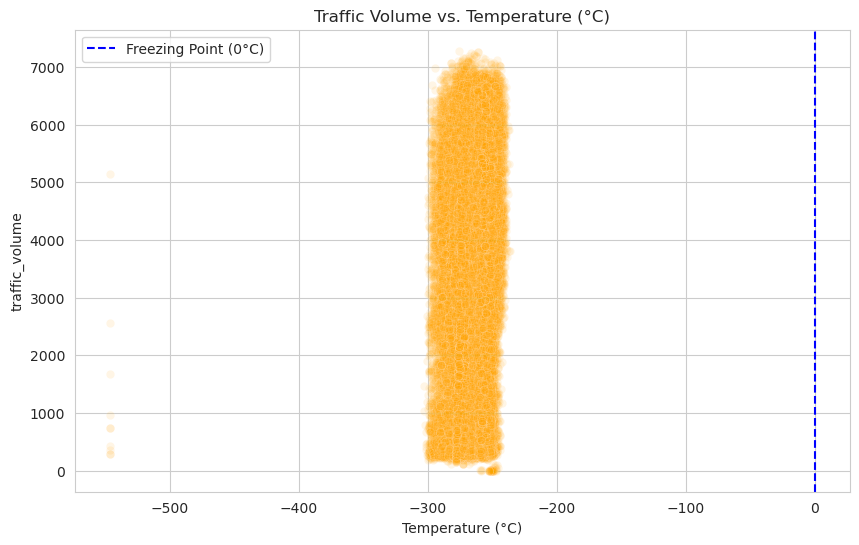

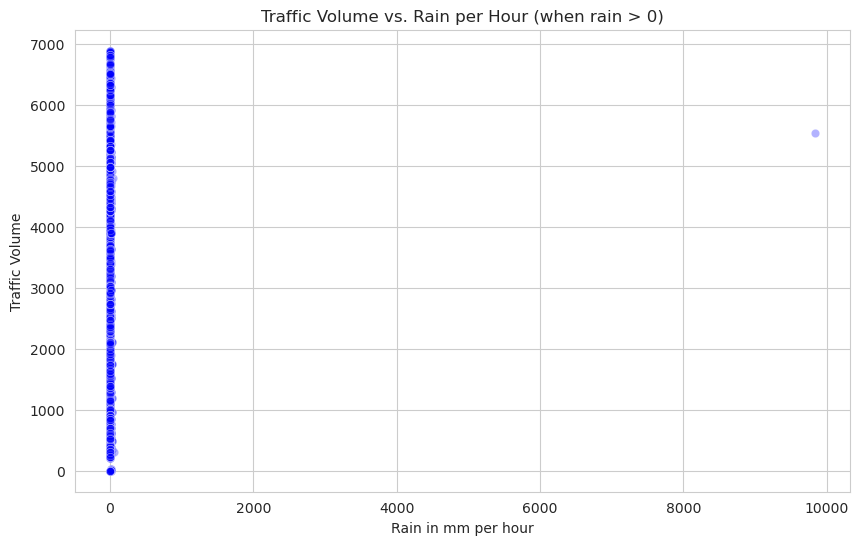

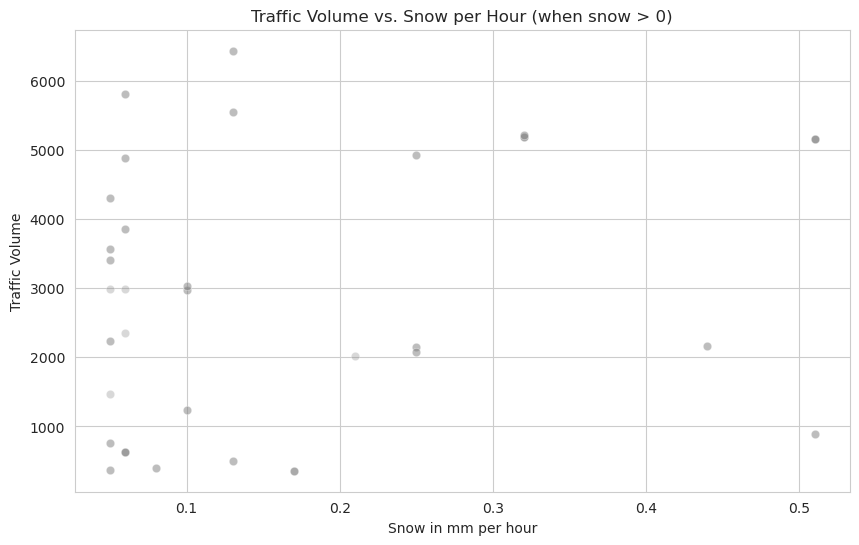

In [50]:
# Traffic Volume vs. Temperature (maintenant en Celsius)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='temp', y='traffic_volume', alpha=0.1, color='orange'
)
# --- Modifications ici ---
plt.title('Traffic Volume vs. Temperature (°C)') # Changé Kelvin en °C
plt.xlabel('Temperature (°C)')                  # Changé Kelvin en °C
# La note sur Kelvin n'est plus pertinente pour l'axe actuel
plt.axvline(
    0, color='blue', linestyle='--', label='Freezing Point (0°C)'
)
plt.legend()
plt.show()

# Traffic Volume vs. Rain (Focus on when it's raining)
plt.figure(figsize=(10, 6))
rain_df = df[df['rain_1h'] > 0]
if not rain_df.empty:
    # Use log scale for rain if skewed, check distribution first
    sns.scatterplot(
        data=rain_df, x='rain_1h', y='traffic_volume', alpha=0.3, color='blue'
    )
    plt.title('Traffic Volume vs. Rain per Hour (when rain > 0)')
    plt.xlabel('Rain in mm per hour')
    plt.ylabel('Traffic Volume')
    # plt.xscale('log')  # Optional: If rain values are heavily skewed
    plt.show()
else:
    print("No rain data points (rain_1h > 0) to plot.")


# Traffic Volume vs. Snow (Focus on when it's snowing)
plt.figure(figsize=(10, 6))
snow_df = df[df['snow_1h'] > 0]
if not snow_df.empty:
    sns.scatterplot(
        data=snow_df, x='snow_1h', y='traffic_volume', alpha=0.3, color='grey'
    )
    plt.title('Traffic Volume vs. Snow per Hour (when snow > 0)')
    plt.xlabel('Snow in mm per hour')
    plt.ylabel('Traffic Volume')
    plt.show()
else:
    print("No snow data points (snow_1h > 0) to plot.")
